## Calculating wind fields from Tropical Cyclone tracks.
This notebook helps you to use implementations of wind field calculations to derive winds from Tropical Cyclones over a given region of interest.

In [1]:
%matplotlib widget
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
from raincoat_takehome_science.plot import InteractiveMapPlotWidget
import xarray as xr

In [2]:
netcdf_file: str = '/home/wilfred/workspace/raincoat-takehome-science/output/data/swath_output_20170002T1200-20170016T1200.nc'
variable: str = 'wsp'

Open the netCDF dataset

In [3]:
dset = xr.open_dataset(netcdf_file)
dset

<xarray.Dataset>
Dimensions:  (lon: 21, lat: 12, time: 68)
Coordinates:
  * lon      (lon) float64 -67.5 -67.4 -67.3 -67.2 ... -65.8 -65.7 -65.6 -65.5
  * lat      (lat) float64 17.5 17.6 17.7 17.8 17.9 ... 18.2 18.3 18.4 18.5 18.6
  * time     (time) datetime64[ns] 2017-09-16T12:00:00 ... 2017-10-02T12:00:00
Data variables:
    wsp      (time, lat, lon) float64 ...
Attributes:
    time_max:   20170016T1200
    time_min:   20170002T1200
    file_name:  /home/wilfred/workspace/raincoat-takehome-science/output/data...

Plot the max winds speeds for the considered time period.

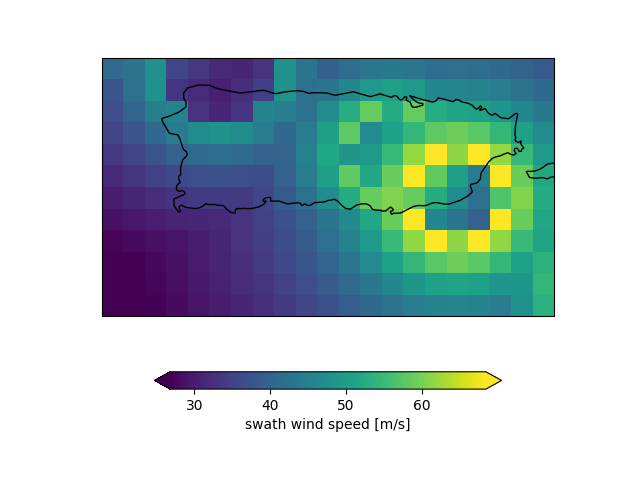

In [4]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
dset[variable].max(dim="time").plot(
    transform=ccrs.PlateCarree(),
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.7,
        "label": f"{dset[variable].attrs['long_name']} [{dset[variable].attrs['units']}]",
    },
    robust=True,
)
axis.coastlines();

Plot the max winds speeds for the considered time period.

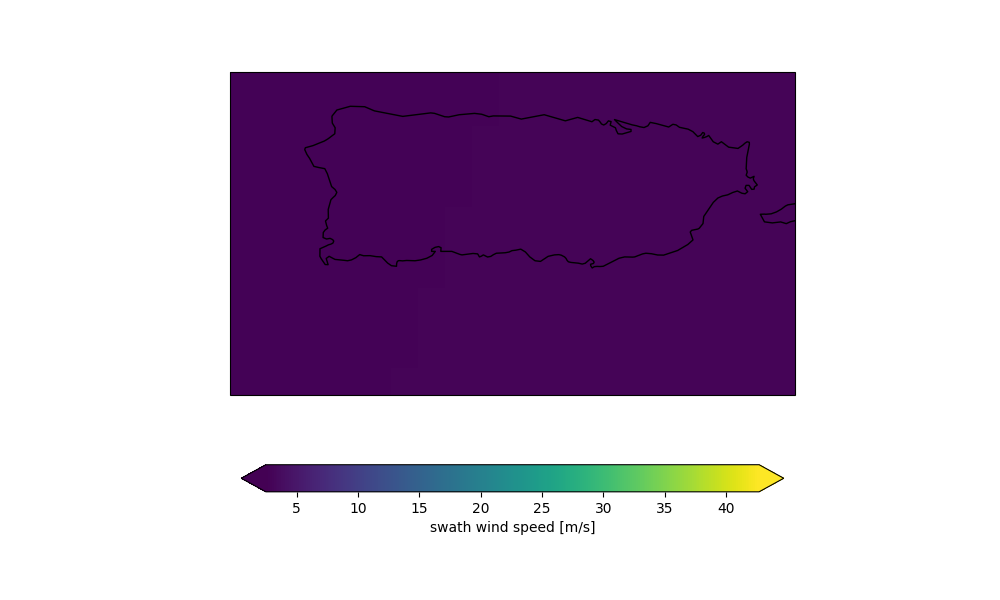

In [5]:
InteractiveMapPlotWidget(dset[variable]);